<a href="https://www.kaggle.com/code/rksmith/bellabeat-case-study?scriptVersionId=93747672" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# About Bellabeat

Bellabeat is a manufacturer of health-focused technological products that empower women with knowledge about their health and habits. 

# Products

- Bellabeat app: connects to their line of smart wellness products and provides users with health data to better understand their current habits.
- Leaf: classic wellness tracker. Tracks activity, sleep, and stress.
- Time: Similar to Leaf, but in watch form.
- Spring: a water bottle that tracks hydration.
- Bellabeat membership: subscription-based membership program that gives users 24/7 access to personalized guidance on nutrition, activity, sleep, health, and beauty.
          

# Task

- What are some trends in smart device usage?
- How could these trends apply to Bellabeat customers?
- How could these trends influence Bellabeat marketing strategy?

# Data

The data, from a survey distributed via Amazon Mechanical Turk,  was supposed to include 03.12.2016-05.12.2016, but only included 04.12.2016-05.12.2016. The additional time frame 03.12.2016-04.11.2016 was able to be found and included in the analysis. 


##### Data sources

- [03.12.2016 - 04.11.2016](https://zenodo.org/record/53894#.YMoUpnVKiP9)
- [04.12.2016 - 05.12.2016](https://www.kaggle.com/arashnic/fitbit)

##### Data limitations included

- low respondent size
- outdated (2016)
- no info on if tracking technologies are equal between products
- gender was not included, which is important to a company focusing on women
- no information on how activity levels are categorized
- data comes from third party

In [1]:
library(tidyverse)
library(janitor)
library(skimr)
library(dplyr)
library(ggrepel)
library(summarytools)
library(lubridate)
library(gghighlight)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp

Warning message:
“no DISPLAY variable so Tk is not available”
system might not have X11 capabilities; in case of errors when using dfSummary(), set st_options(use.x11 = FALSE)

For best results, restart R session and update pander using devtools:: or remotes::install_github('rapporter/pander')


Attaching package: ‘summarytools’


The following object is masked from ‘package:tibble’:

    view



Attaching pac

In [2]:
# loading data
dailyactivity1 <- read_csv("../input/fitbit-export-31216/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv")
dailyactivity2 <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleepminutes <- read_csv("../input/fitbit-export-31216/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv")
sleepday <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

Rows: 457 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 940 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 198559 Columns: 4

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): date
dbl (3): Id, value, logId


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Speci

# Cleaning

In [3]:
# checking activity data
head(dailyactivity1, 3)
head(dailyactivity2, 3)
head(sleepday, 3)
head(sleepminutes, 3)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,3/25/2016,11004,7.11,7.11,0,2.57,0.46,4.07,0,33,12,205,804,1819
1503960366,3/26/2016,17609,11.55,11.55,0,6.92,0.73,3.91,0,89,17,274,588,2154
1503960366,3/27/2016,12736,8.53,8.53,0,4.66,0.16,3.71,0,56,5,268,605,1944


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442


Id,date,value,logId
<dbl>,<chr>,<dbl>,<dbl>
1503960366,3/13/2016 2:39:30 AM,1,11114919637
1503960366,3/13/2016 2:40:30 AM,1,11114919637
1503960366,3/13/2016 2:41:30 AM,1,11114919637


***
- 1 of the sleep data does not contain the minutes asleep and will have to be calculated.
- Date will have to be changed for all.
***

In [4]:
# counting distinct ids
n_distinct(dailyactivity1$Id)
n_distinct(dailyactivity2$Id)
n_distinct(sleepday$Id)
n_distinct(sleepminutes$Id)

[1] 35

[1] 33

[1] 24

[1] 23

****
- **2** users quit **activity tracking**
- **1** user quit **sleep tracking** 
- Activity tracking had more users than sleep tracking
***

In [5]:
# checking matching activity ids
ids_identa <- subset(dailyactivity1, Id %in% dailyactivity2$Id) 
n_distinct(ids_identa$Id)

ids_idents <- subset(sleepday, Id %in% sleepminutes$Id) 
n_distinct(ids_idents$Id)

[1] 33

[1] 22

***
- **Activity**: **100%** of ids match
- **Sleep**: **1** id missing

***

In [6]:
# checking non-matching
non_match <- subset(sleepday, !(Id %in% sleepminutes$Id))
head(non_match, 3)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2320127002,4/23/2016 12:00:00 AM,1,61,69
4388161847,4/15/2016 12:00:00 AM,1,499,526
4388161847,4/16/2016 12:00:00 AM,2,426,448


***
- 1 of the non-matching ids has only one record.

***

In [7]:
# cleaning/changing to date
dailyactivity1 <-  dailyactivity1 %>%
  clean_names() %>% 
  rename('date' = 'activity_date') %>%
  mutate(date = mdy(date)) %>% 
  select(-c(logged_activities_distance, sedentary_active_distance)) 

# cleaning/changing date        
dailyactivity2 <- dailyactivity2 %>% 
  clean_names() %>% 
  rename('date' = 'activity_date') %>%
  mutate(date = mdy(date)) %>% 
  select(-c(logged_activities_distance, sedentary_active_distance)) 

# cleaning/changing date/creating minutes slept per night
sleepminutes <- sleepminutes %>% 
  clean_names() %>% 
  separate(date, into = c('date', 'time', 'am/pm'), sep = ' ', remove = FALSE) %>%       
  mutate(date = mdy(date)) %>% 
  select(c('id', 'date')) %>% 
  count(date, id, name = 'minutes_asleep')
 
# cleaning/changing date
sleepday <- sleepday %>%  
  clean_names() %>% 
  rename('minutes_asleep' = 'total_minutes_asleep') %>% 
  separate(sleep_day, into = c('date', 'time', 'am/pm'), sep = ' ', remove = FALSE) %>% 
  select(c('id', 'date', 'minutes_asleep')) %>% 
  mutate(date = mdy(date))

In [8]:
# checking matching dates
date_identa <- subset(dailyactivity1, date %in% dailyactivity2$date) 
n_distinct(date_identa$date)

date_idents <- subset(sleepday, date %in% sleepminutes$date) 
n_distinct(date_idents$date)

[1] 1

[1] 1

***
- A duplicate date is found in both data sets.
***

In [9]:
head(date_identa, 3)
head(date_idents, 3)


id,date,total_steps,total_distance,tracker_distance,very_active_distance,moderately_active_distance,light_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,224,0.14,0.14,0,0,0.13,0,0,9,32,50
1624580081,2016-04-12,6627,4.31,4.31,0,0,4.31,0,0,89,604,706
1844505072,2016-04-12,0,0.00,0.00,0,0,0.00,0,0,0,426,399


id,date,minutes_asleep
<dbl>,<date>,<dbl>
1503960366,2016-04-12,327
1927972279,2016-04-12,750
2026352035,2016-04-12,503


***
- An extra day was included in both the 03.12.2016 - 04.11.2016 data sets, 04.12.2016.

***

In [10]:
# removing extra day
dailyactivity1 <- dailyactivity1[!(dailyactivity1$date == "2016-04-12"),]
sleepminutes <- sleepminutes[!(sleepminutes$date == "2016-04-12"),]


In [11]:
# bind
da <- rbind(dailyactivity1, dailyactivity2)
sleep <- rbind(sleepminutes, sleepday)

In [12]:
# checking for duplicates
get_dupes(da,date,id)
get_dupes(sleep,date,id)

No duplicate combinations found of: date, id



date,id,dupe_count,total_steps,total_distance,tracker_distance,very_active_distance,moderately_active_distance,light_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<date>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


date,id,dupe_count,minutes_asleep
<date>,<dbl>,<int>,<dbl>
2016-04-25,8378563200,2,388
2016-04-25,8378563200,2,388
2016-05-05,4388161847,2,471
2016-05-05,4388161847,2,471
2016-05-07,4702921684,2,520
2016-05-07,4702921684,2,520


***
- There were 3 duplicates in the sleep data.
***

In [13]:
# removing duplicates
sleep <- distinct(sleep, date, id, .keep_all= TRUE)

In [14]:
# checking ids between sleep and activity
da_sleep <- subset(da, id %in% sleep$id)
n_distinct(da$id)
n_distinct(sleep$id)
n_distinct(da_sleep$id)

[1] 35

[1] 25

[1] 25

***
- All ids match 
***

In [15]:
# merging data
merged_data <- merge(sleep, da, by =c('id', 'date'))

head(merged_data, 3)

,id,date,minutes_asleep,total_steps,total_distance,tracker_distance,very_active_distance,moderately_active_distance,light_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-03-25,386,11004,7.11,7.11,2.57,0.46,4.07,33,12,205,804,1819
2,1503960366,2016-03-26,472,17609,11.55,11.55,6.92,0.73,3.91,89,17,274,588,2154
3,1503960366,2016-03-27,506,12736,8.53,8.53,4.66,0.16,3.71,56,5,268,605,1944


# Analysis: Activity



In [16]:
# Checking summary statistics
da_stats <- select(da, c(sedentary_minutes, lightly_active_minutes, fairly_active_minutes, very_active_minutes, calories, total_steps))
descr(da_stats, headings = FALSE, stats= c("mean","med", "sd"), style = "rmarkdown")


,calories,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,total_steps,very_active_minutes
Mean,2294.812,13.60379,188.0961,1001.3467,7377.375,19.87109
Median,2129.000,6.00000,196.0000,1062.0000,7142.000,2.00000
Std.Dev,725.527,26.58155,113.0951,304.1682,5198.133,31.81763


***
- **Average daily steps** was **7,377**, which is under the 10,000 daily recommendation.
- Majority of time spent in sedentary category

***

In [17]:
# creating a data frame with zero steps
steps_zero <- filter(da, total_steps == "0", total_distance == "0")

# counting unique ids with zero steps
n_distinct(steps_zero$id)

[1] 20

***
- **57%** of users missed at least 1 day of activity tracking.

***

In [18]:
# Counting number of times an id did not log steps 
steps_zero %>% 
  count(id) %>% 
  arrange(desc(n))

id,n
<dbl>,<int>
1927972279,14
4020332650,14
4057192912,14
6290855005,13
1844505072,12
6775888955,10
8792009665,10
4388161847,8
6117666160,7


***
- ***20%*** of users missed over 10 days of activity tracking.

***

In [19]:
# removing days with  0 steps
low_step <- subset(da_stats, total_steps>0)

# checking summary statistics, - zero step days
descr(low_step, headings = FALSE, stats= c("mean", "med", "sd"), style = "rmarkdown")

,calories,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,total_steps,very_active_minutes
Mean,2361.2121,14.53065,208.27097,960.7935,8168.658,21.93306
Median,2217.5000,8.00000,208.50000,1020.0000,7798.500,5.00000
Std.Dev,708.1851,20.60632,99.79109,281.5879,4842.744,32.78826


***

Removing days where activity was not tracked by filtering out days with 0 steps and 0 distance.

- **Increase** in daily steps by **791.28**
- **Decrease** in sedentary minutes by **40.56**

****

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



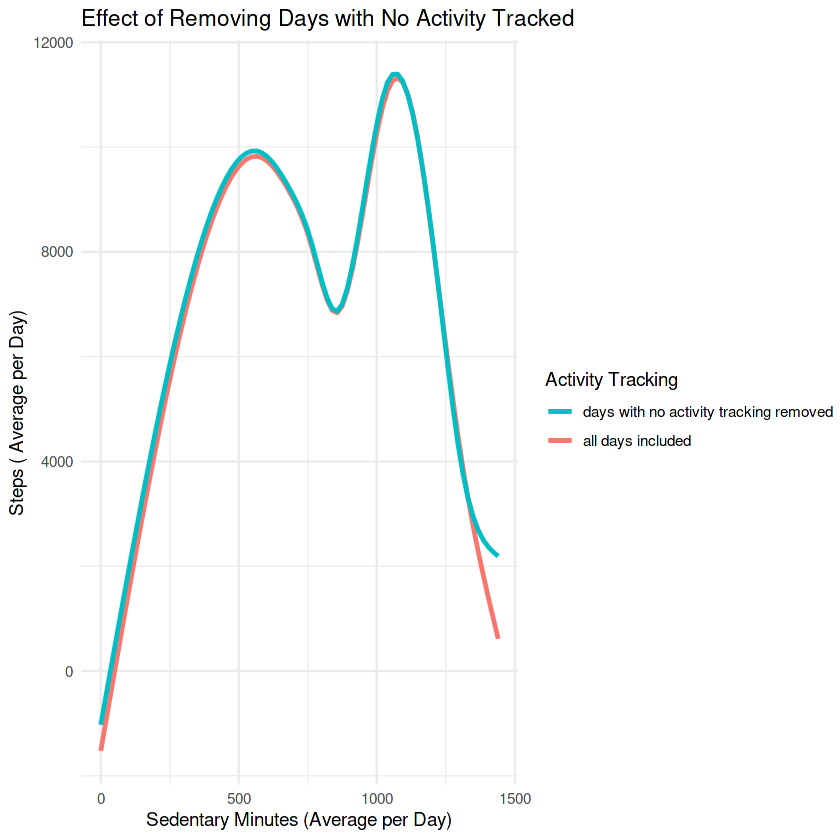

In [20]:
# comparing with/without no activity days                          
ggplot()+
  geom_smooth(data = da_stats, aes(sedentary_minutes, total_steps, color = '1'), se = FALSE)+
  geom_smooth(data = low_step, aes(sedentary_minutes, total_steps, color = '2'), se = FALSE)+
  labs(
    x = 'Sedentary Minutes (Average per Day)',
    y = 'Steps ( Average per Day)',
    title = 'Effect of Removing Days with No Activity Tracked'
  )+
  scale_color_discrete(name = 'Activity Tracking',
                       breaks = c('2', '1'),
                       labels = c('days with no activity tracking removed', 'all days included')
  )+
  theme_minimal()

***
- Largest difference in right tail end.
- Removal of days with no activity tracking increases step average throughout.

***

In [21]:
# adding in steps over 200 as another cutoff
steps_under_200 <- subset(da_stats, total_steps > 200)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



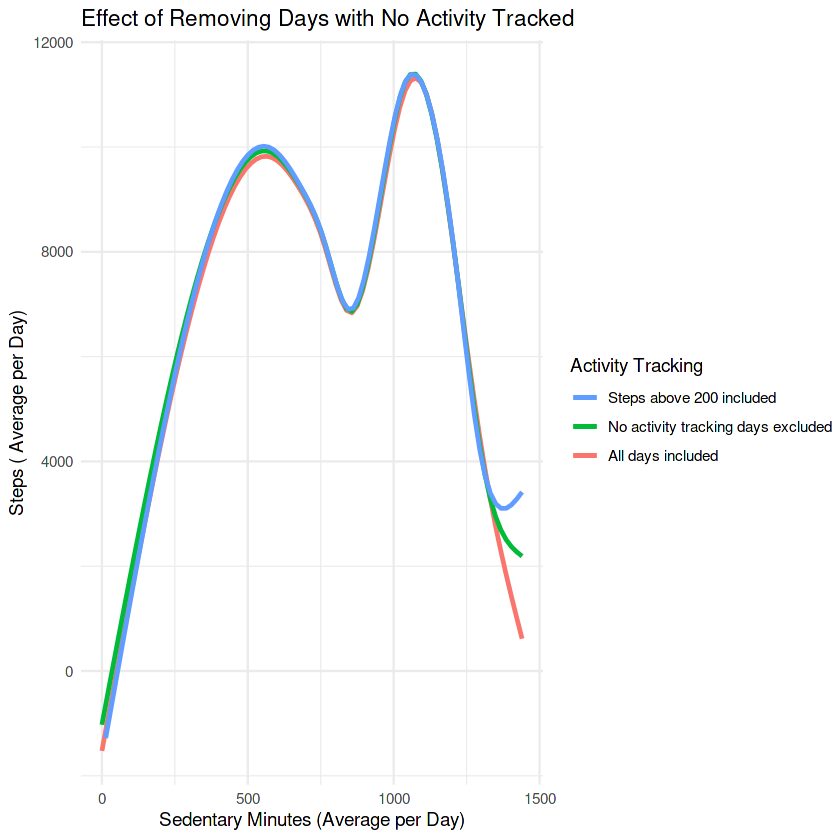

In [22]:
# adding 200 step cutoff to plot
ggplot()+
  geom_smooth(data = da_stats, aes(sedentary_minutes, total_steps, color = '1'), se = FALSE)+
  geom_smooth(data = low_step, aes(sedentary_minutes, total_steps, color = '2'), se = FALSE)+
  geom_smooth(data = steps_under_200, aes(sedentary_minutes, total_steps, color = '3'), se = FALSE)+
  labs(
    x = 'Sedentary Minutes (Average per Day)',
    y = 'Steps ( Average per Day)',
    title = 'Effect of Removing Days with No Activity Tracked'
  )+
  scale_color_discrete(name = 'Activity Tracking',
                       breaks = c('3', '2', '1'),
                       labels = c('Steps above 200 included', 'No activity tracking days excluded', 'All days included')
  )+
  theme_minimal()

***
- Largest difference remains in right tail end.

***

In [23]:
# adding a count of days used by id
a1 <- da %>% 
  add_count(id, name = 'days_used') 

summary(a1$days_used)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00   39.00   42.00   41.46   42.00   62.00 

In [24]:
# averaging daily steps
steps_date <- da %>% 
  group_by(date) %>% 
  mutate(avg_steps = mean(total_steps)) 

# creating days
steps_date$day <- as.factor(weekdays(steps_date$date))
steps_date$day <- factor(steps_date$day, 
                        levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
# creating weekday/weekend
steps_date$daytype <- "weekday"
steps_date$daytype[steps_date$day %in% c("Saturday", "Sunday")] <- "weekend"

# averaging daily steps by day and weekday/weekend
steps_date <- steps_date %>% 
  group_by(day) %>% 
  mutate(avg_steps_day = mean(total_steps)) %>% 
  group_by(daytype) %>% 
  mutate(avg_steps_dt  = mean(avg_steps))


head(select(steps_date, "day", "avg_steps_day", "daytype", "avg_steps_dt"), 7)

day,avg_steps_day,daytype,avg_steps_dt
<fct>,<dbl>,<chr>,<dbl>
Friday,7187.533,weekday,7452.942
Saturday,7752.271,weekend,7188.265
Sunday,6606.725,weekend,7188.265
Monday,7541.319,weekday,7452.942
Tuesday,7718.960,weekday,7452.942
Wednesday,7547.576,weekday,7452.942
Thursday,7268.297,weekday,7452.942


***
- **Weekdays**: higher daily step average

***

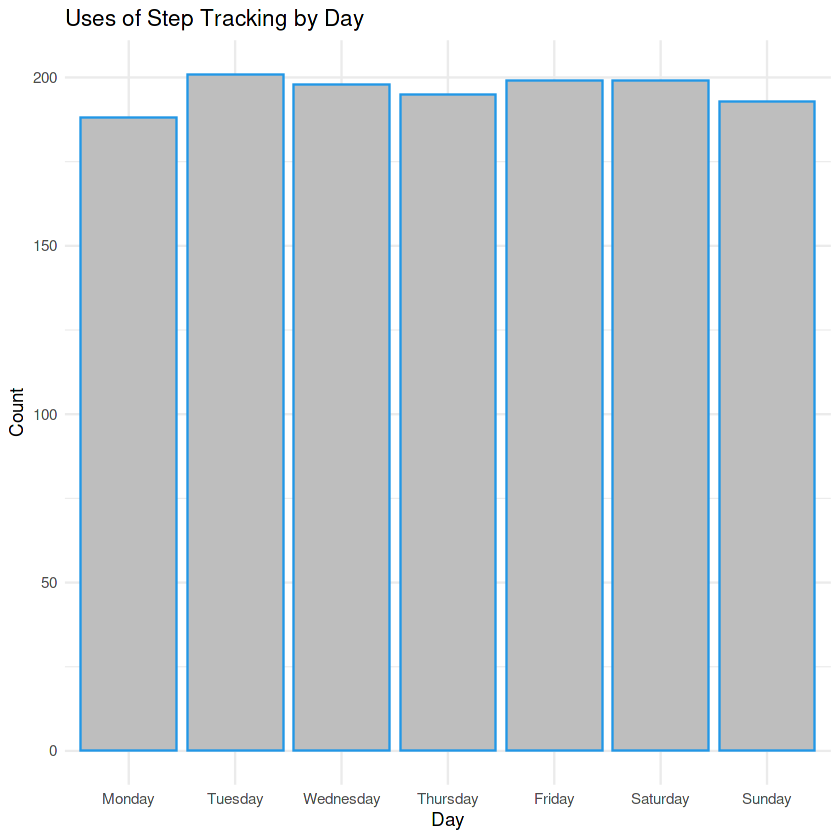

In [25]:
# days used
ggplot(steps_date, aes(day))+
  geom_bar(colour = "4", fill = "grey")+
    labs(
    x = "Day",
    y = "Count",
    title = "Uses of Step Tracking by Day"
  )+
  theme_minimal()

***
- ***Monday***: lowest number of recordings.

***

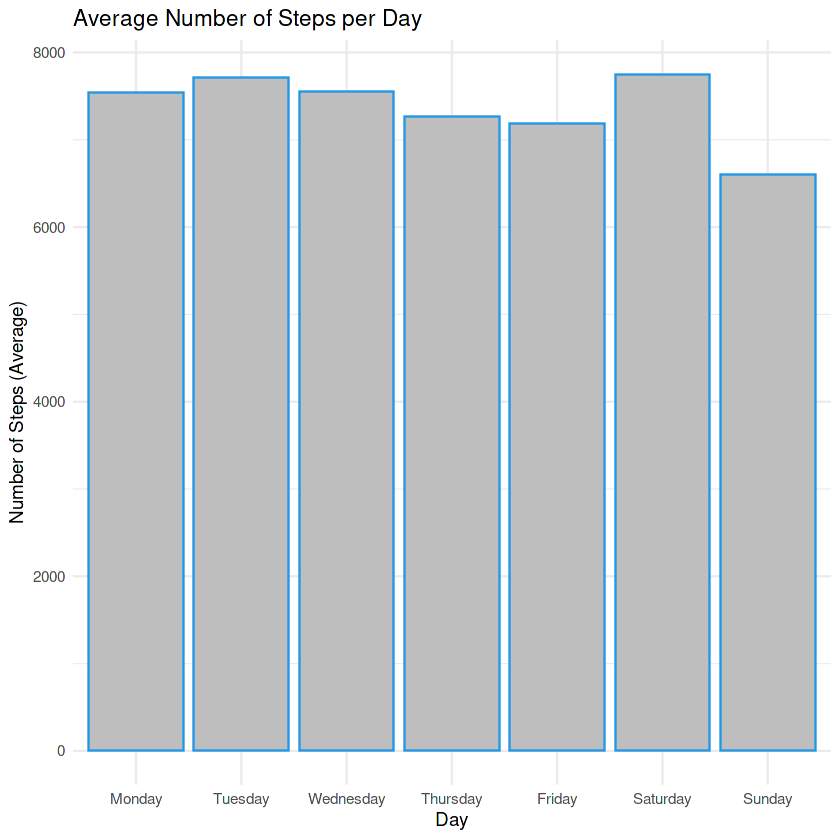

In [26]:
# steps by day
ggplot(steps_date, aes(day, total_steps))+
  geom_bar(stat= "summary", 
           fun = "mean", 
           colour = "4", 
           fill = "grey"
           )+
    labs(
    x = "Day",
    y = "Number of Steps (Average)",
    title = "Average Number of Steps per Day"
  )+
  theme_minimal()

***
- **Sunday**: lowest average steps. 
- **Saturday**: highest average steps.
- Pattern of steps falling over course of week.

***

In [27]:
# creating values for pie chart w/percentage
va_perc <- sum(da$very_active_minutes)/sum(da$very_active_minutes, da$fairly_active_minutes, da$lightly_active_minutes, da$sedentary_minutes) * 100

fa_perc <-sum(da$fairly_active_minutes)/sum(da$very_active_minutes, da$fairly_active_minutes, da$lightly_active_minutes, da$sedentary_minutes) * 100

la_perc <-sum(da$lightly_active_minutes)/sum(da$very_active_minutes, da$fairly_active_minutes, da$lightly_active_minutes, da$sedentary_minutes) * 100

s_perc <- sum(da$sedentary_minutes)/sum(da$very_active_minutes, da$fairly_active_minutes, da$lightly_active_minutes, da$sedentary_minutes) * 100

# creating lists
a_perc = c(va_perc, fa_perc, la_perc, s_perc)
a_perc <- round(a_perc)
activity_level = c("very active", "fairly active", "lightly active", "sedentary")

# creating data frame
perc_activity <- data.frame(percentage = a_perc, activity = activity_level)

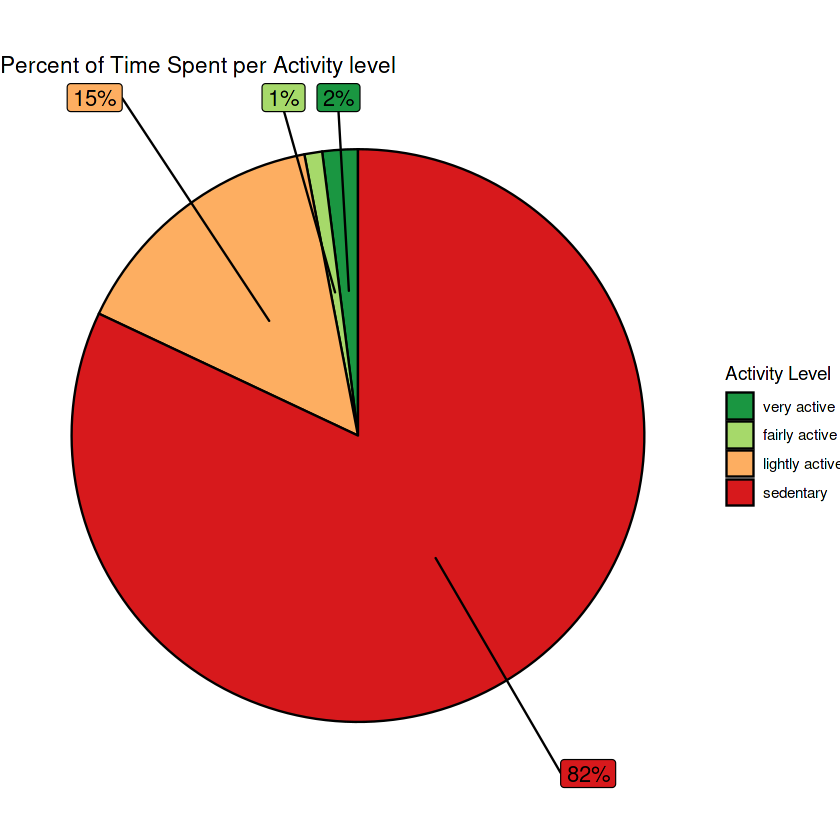

In [28]:
# Pie chart with percentages w/ labels outside
pie_perc <- perc_activity %>% 
  mutate(csum = rev(cumsum(rev(percentage))),
         pos = percentage/2 + lead(csum, 1),
         pos = if_else(is.na(pos), percentage/2, pos))

ggplot(perc_activity, aes(x="", y= percentage, fill= fct_inorder(activity)))+
  geom_col(width = 1, color = 1)+
  coord_polar(theta = "y")+
  scale_fill_brewer(palette = "RdYlGn", direction = -1)+
  geom_label_repel(data = pie_perc,
                   aes(y = pos, label = paste0(percentage, "%")),
                   size = 4.5, nudge_x = 1, show.legend = FALSE)+
  guides(fill = guide_legend(title = "Activity Level"))+
  labs(
    title = 'Percent of Time Spent per Activity level'
  )+
  theme_void()

***
- ***Sedentary*** activity level accounted for ***82%*** of time tracked.

***

# Analysis: Sleep

In [29]:
# adding a count of nights used by id
s1 <- sleep %>% 
  add_count(id, name = 'nights_used') 

s2 <- sleep %>% 
  group_by(id) %>% 
  mutate(avg_min = mean(minutes_asleep)) %>% 
  add_count(id, name = 'nights_used') 

head(s1, 10)

date,id,minutes_asleep,nights_used
<date>,<dbl>,<dbl>,<int>
2016-03-11,1927972279,36,35
2016-03-11,2026352035,149,60
2016-03-11,2347167796,17,46
2016-03-11,4319703577,90,54
2016-03-11,4702921684,124,57
2016-03-11,5577150313,161,58
2016-03-11,6117666160,78,45
2016-03-11,6775888955,75,20
2016-03-11,6962181067,31,63


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



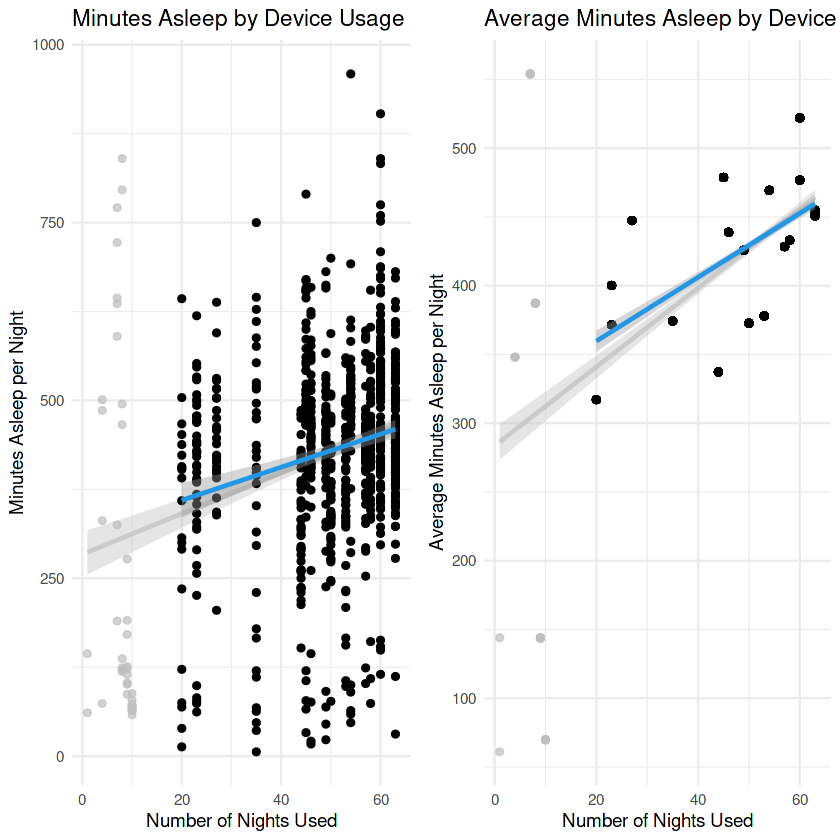

In [30]:
# avg sleep length by times sleep recorded
plot1 <- ggplot(s1, aes(nights_used, minutes_asleep))+
            geom_point()+
            geom_smooth(method = lm, colour = '4')+
            labs(
                  x = "Number of Nights Used",
                  y = "Minutes Asleep per Night",
                  title = "Minutes Asleep by Device Usage"
            )+
            theme_minimal()+
            gghighlight(nights_used > 10)

plot2 <- ggplot(s2, aes(nights_used, avg_min))+
            geom_point()+
            geom_smooth(method = lm, colour = '4')+
            labs(
                  x = "Number of Nights Used",
                  y = "Average Minutes Asleep per Night",
                  title = "Average Minutes Asleep by Device Usage"
            )+
            theme_minimal()+
            gghighlight(nights_used > 10)

plot_grid(plot1, plot2)

***
- Graph highlights users with over 10 days of recorded sleep tracking
- Positive correlation between sleep tracking and time asleep. 

***

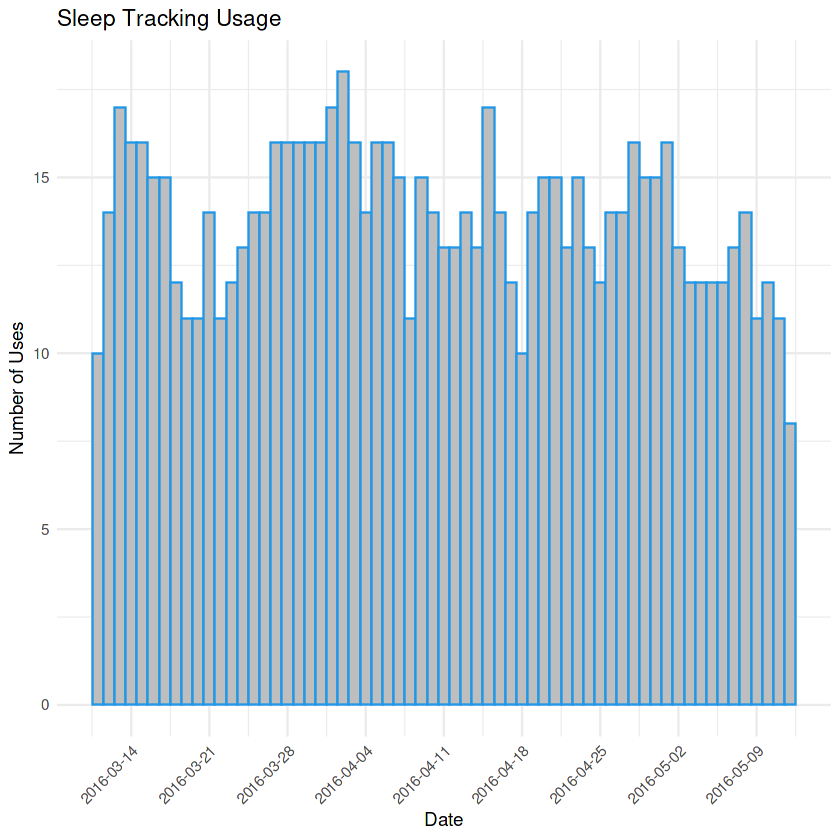

In [31]:
# sleep tracking over time
ggplot(sleep, aes(x = date))+
  geom_histogram(colour = "4", fill = "grey", bins = 63)+
  scale_x_date(
    date_breaks = "1 week"
  )+
  labs(
    x = "Date",
    y = "Number of Uses",
    title = "Sleep Tracking Usage"
  )+
  theme_minimal()+
  theme(axis.text.x = element_text(angle = 45, hjust=1))

***
- Sleep tracking falls off towards end of survey period.

***

In [32]:
# nights used w/all data
s2 <- sleep %>%
  add_count(id, name = 'nights_used')

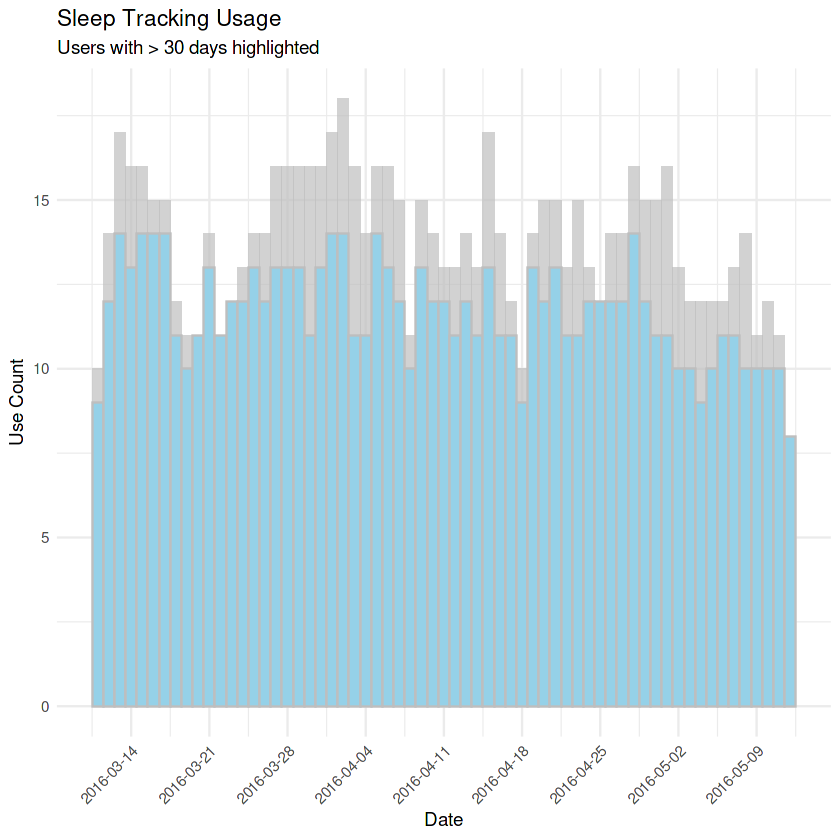

In [33]:
# creating graph highlighting users who used sleep > 30 nights
ggplot(s2, aes(x = date, fill = nights_used))+
  geom_histogram(colour = 'grey', fill = "#95d1e8", bins = 63)+
   scale_x_date(
    date_breaks = "1 week"
  )+
  labs(
    x = "Date",
    y = "Use Count",
    title = "Sleep Tracking Usage",
    subtitle = "Users with > 30 days highlighted"
  )+
  gghighlight(nights_used > 30)+
  theme_minimal()+
  theme(axis.text.x = element_text(angle = 45, hjust=1))

***
- Drop in sleep tracking present in users with > 30 days tracked.
***

In [34]:
# Converting date to day
sleep$day_name <- as.factor(weekdays(sleep$date))
sleep$day_name <- factor(sleep$day_name, 
                        levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

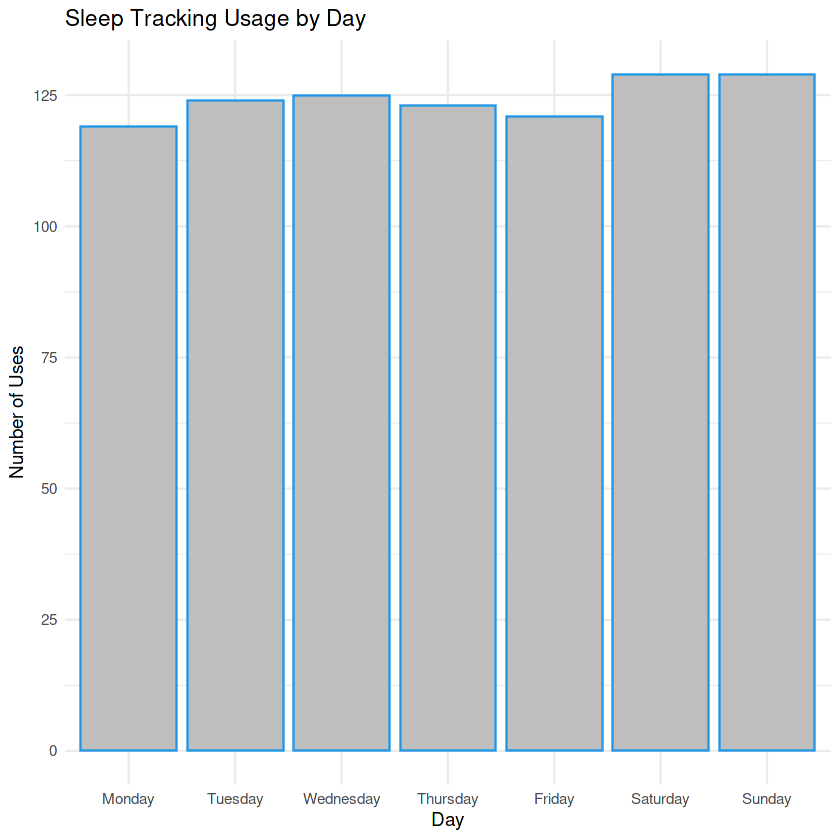

In [35]:
# sleep tracking by day
ggplot(sleep, aes(x = day_name))+
  geom_bar(colour = "4", fill = "grey")+
  labs(
    x = "Day",
    y = "Number of Uses",
    title = "Sleep Tracking Usage by Day"
  )+
  scale_y_continuous(
    breaks = seq(
      from = 0,
      to = 125,
      by = 25)
  )+
  theme_minimal()

***
- **Monday**: lowest number of recordings.

***

# Analysis: Merged Data

In [36]:
# creating groups based on number of days used
merged_count <- merged_data %>% 
                    add_count(id, name = 'days_used') 
                   
summary(merged_count$days_used)

#creating usage categories
merged_days <- merged_count %>% 
                mutate(usage_level = case_when(
                    between(days_used, 1, 14) ~ 'low',
                    between(days_used, 15, 29) ~ 'moderate',
                    between(days_used, 29, 44) ~ 'high'
                    )) 

 # categories as factors
merged_days$usage_level <- as.factor(merged_days$usage_level)
merged_days$usage_level <- factor(merged_days$usage_level, 
                        levels = c("high", "moderate", "low"))                 

# number of users in each category
merged_days %>%
    group_by(usage_level) %>%
    distinct(id) %>%
    summarise(count = n())


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   29.00   39.00   33.87   41.00   44.00 

usage_level,count
<fct>,<int>
high,11
moderate,5
low,8


`geom_smooth()` using formula 'y ~ x'



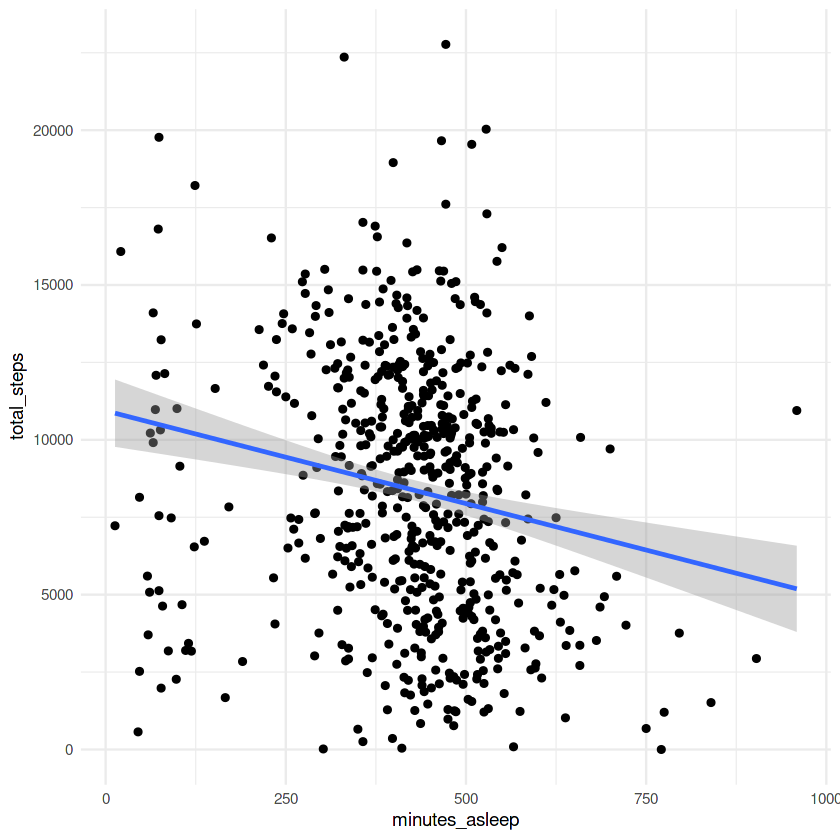

In [37]:
# plot of steps compared to sleep
ggplot(merged_data, aes(minutes_asleep, total_steps))+
    geom_point()+
    geom_smooth(method = lm)+
    theme_minimal()






`geom_smooth()` using formula 'y ~ x'



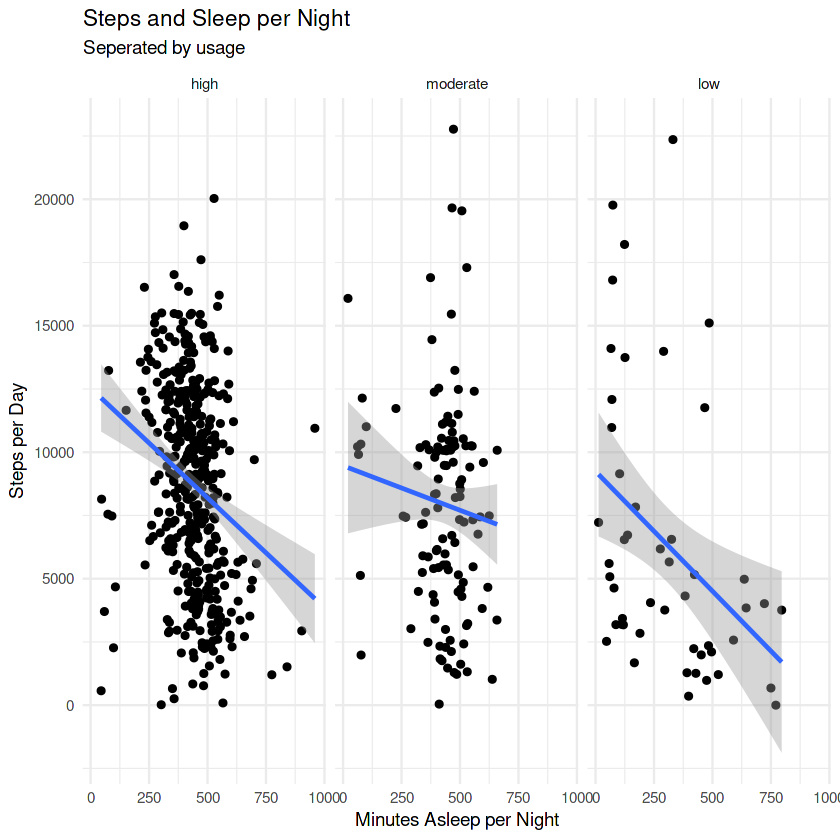

In [38]:
# steps compared to sleep by usage
ggplot(merged_days, aes(minutes_asleep, total_steps))+
    geom_point()+
    geom_smooth(method = lm)+
    facet_wrap( ~usage_level)+
    labs(
        x = "Minutes Asleep per Night",
        y = "Steps per Day",
        title = "Steps and Sleep per Night",
        subtitle = "Seperated by usage")+
    theme_minimal()



***
- Negative correlation between sleep time and steps per day.
***

# Trends

- Users are likely to be sedentary.
- Users are likely to have fewer steps than the recommended daily amount.
- Users are less active on Sunday.
- Users were prone to missing days.
- Monday had the lowest number of records for both activity and sleep tracking.
- Sleep tracking usage was trending down towards the end of the survey.
- Time asleep and sleep tracking were correlated.

# Recomendations

- Create opt-in anonymized data collection of users for better future analysis.
- Create a standardized cutoff to include daily data based on a user's usage. 
- Create an alert to remind users to wear the product.
- Extra alert on Monday to increase usage of products. 
- Extra alert on Sunday to increase activity level.
- Additional sleep features in the app could be beneficial and increase interest in sleep tracking long term.
- Divide users based on activity level or stated goal for targeted content.
- Create friend groups on the app to compete and compare activities, which may also lead to fewer days missed.
- Marketing should focus on the 'average person' instead of those who already have high activity levels. 
